# Hands-On Machine Learning Project
## Topic 20: Credit Data
### Florian Korn, Vincent Bläske, Dennis Götz

**General comments by FV:**

- Quite good overall!

- You have a Jupyter notebook which allows you to mix text with code, but you nevertheless put a lot of "narrative" into comments at the beginning of the code blocks, instead of in text cells!

- I wrote many notes (marked like this one) all over the notebook. Please read them!

- It was not intended that one conducts formal statistical tests for normality, etc. of the features.

- For training models later on you should think about whether you want to represent the categorical features "as numbers" or as "one-hot encoded" (maybe try both and check what works better). Note that if you choose numerical encoding, you might want to choose the encoding by hand so that the "ordering/numbering" of the values makes sense. See the comments below for more details.

## I. Get the Data
1. Get (download) the data.
2. Convert the data to a format you can easily manipulate (without changing the data itself), e.g. a Pandas
DataFrame.
3. Sample a test set, put it aside, and never look at it (no data snooping!)

In [85]:
# Import libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import scipy.stats as stats

# Attributes
attributes = ['Status of existing checking account',
              'Duration in month',
              'Credit history',
              'Purpose',
              'Credit amount', 
              'Savings account/bonds',
              'Present employment since',
              'Installment rate in percentage of disposable income', 
              'Personal status and sex',
              'Other debtors / guarantors',
              'Present residence since',
              'Property',
              'Age in years',
              'Other installment plans',
              'Housing',
              'Number of existing credits at this bank',
              'Job',
              'Number of people being liable to provide maintenance for',
              'Telephone',
              'foreign worker',
              'Credit rating']

# Load original dataset DATA-Format
data = pd.read_csv('german.data', sep=' ', header=None)
data.columns = attributes

data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [86]:
data.info() #many categorical attributes
#data.hist(bins=50, figsize=(25,12));

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

The "real meanings" of the codes are taken from the description of the data set (see [here](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)).

In [87]:
# Create dictionary with real values to make the DataFrame readable

cat_dict = {# Attribute 1: (qualitative) Status of existing checking account 
                    'A11' : '... < 0 DM',
                    'A12' : '0 <= ... < 200 DM',
                    'A13' : '... >= 200 DM / salary assignments for at least 1 year',
                    'A14' : 'no checking account',

                    # Attribute 3: (qualitative) Credit history 
                    'A30' : 'no credits taken/ all credits paid back duly',
                    'A31' : 'all credits at this bank paid back duly',
                    'A32' : 'existing credits paid back duly till now',
                    'A33' : 'delay in paying off in the past',
                    'A34' : 'critical account/ other credits existing (not at this bank)',
                    
                    # Attribute 4: (qualitative) Purpose 
                    'A40' : 'car (new)',
                    'A41' : 'car (used)',
                    'A42' : 'furniture/equipment',
                    'A43' : 'radio/television',
                    'A44' : 'domestic appliances',
                    'A45' : 'repairs',
                    'A46' : 'education',
                    'A47' : '(vacation - does not exist?)',
                    'A48' : 'retraining',
                    'A49' : 'business',
                    'A410' : 'others',

                    # Attibute 6: (qualitative) Savings account/bonds 
                    'A61' : '... < 100 DM',
                    'A62' : '100 <= ... < 500 DM',
                    'A63' : '500 <= ... < 1000 DM',
                    'A64' : '... >= 1000 DM',
                    'A65' : 'unknown/ no savings account',

                    # Attribute 7: (qualitative) Present employment since 
                    'A71' : 'unemployed',
                    'A72' : '... < 1 year',
                    'A73' : '1 <= ... < 4 years',
                    'A74' : '4 <= ... < 7 years',
                    'A75' : '... >= 7 years',

                    # Attribute 9: (qualitative) Personal status and sex 
                    'A91' : 'male : divorced/separated',
                    'A92' : 'female : divorced/separated/married',
                    'A93' : 'male : single',
                    'A94' : 'male : married/widowed',
                    'A95' : 'female : single',

                    # Attribute 10: (qualitative) Other debtors / guarantors 
                    'A101' : 'none',
                    'A102' : 'co-applicant',
                    'A103' : 'guarantor',

                    # Attribute 12: (qualitative) Property 
                    'A121' : 'real estate',
                    'A122' : 'if not A121 : building society savings agreement/ life insurance',
                    'A123' : 'if not A121/A122 : car or other, not in attribute 6',
                    'A124' : 'unknown / no property',

                    # Attribute 14: (qualitative) Other installment plans 
                    'A141' : 'bank',
                    'A142' : 'stores',
                    'A143' : 'none',

                    # Attribute 15: (qualitative) Housing 
                    'A151' : 'rent',
                    'A152' : 'own',
                    'A153' : 'for free',

                    # Attribute 17: (qualitative) Job
                    'A171' : 'unemployed/ unskilled - non-resident',
                    'A172' : 'unskilled - resident',
                    'A173' : 'skilled employee / official',
                    'A174' : 'management/ self-employed/ highly qualified employee/ officer',

                    # Attribute 19: (qualitative) Telephone
                    'A191' : 'none',
                    'A192' : 'yes, registered under the customers name',

                    # Attribute 20: (qualitative) foreign worker 
                    'A201' : 'yes',
                    'A202' : 'no',

                    # Target value: (qualitative) Credit rating
                    1 : 'good',
                    2 : 'bad'
                    }

In [88]:
# Qualitative attributes
cat_attribs = ['Status of existing checking account',
               'Credit history',
               'Purpose',
               'Savings account/bonds', 
               'Present employment since',
               'Personal status and sex',
               'Other debtors / guarantors',
               'Property',
               'Other installment plans',
               'Housing',
               'Job',
               'Telephone',
               'foreign worker',
               'Credit rating']

# Numerical attributes
num_attribs = list(set(attributes) - set(cat_attribs))

# Copy the data to a new DataFrame
data_values = data.copy()

# Apply the dictionary to all categorical attributes of the new DataFrame to get the real values
data_values[cat_attribs] = pd.DataFrame([data_values[attribute].apply(lambda key: cat_dict[key]) for attribute in cat_attribs]).T

# Save new DataFrame as XLSX
data_values.to_excel('data_values.xlsx')
data_values.head(3)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,good


In [89]:
# Create a Test Set
train_set, test_set = train_test_split(data_values, train_size=0.8, random_state=0, stratify=data_values['Credit rating'], shuffle=True)

# Separate features and target values in train and test set
X_train = np.array(train_set.iloc[:, :-1])
y_train = np.array(train_set.iloc[:, -1])
X_test = np.array(test_set.iloc[:, :-1])
y_test = np.array(test_set.iloc[:, -1])

print(f'{X_train.shape = }')
print(f'{X_test.shape = }\n')

# Check if training and test set have the same target-value-ratio
print('Ratio of target value bad (2) in y_train: {:.2f} %'.format(100*np.sum(y_train == 'bad')/len(y_train)))
print('Ratio of target value bad (2) in y_test: {:.2f} %'.format(100*np.sum(y_test == 'bad')/len(y_test)))

X_train.shape = (800, 20)
X_test.shape = (200, 20)

Ratio of target value bad (2) in y_train: 30.00 %
Ratio of target value bad (2) in y_test: 30.00 %


In [90]:
# Create a list with all ordered categorical attributes
ordinal_cat_attribs = ['Status of existing checking account',
                       'Savings account/bonds',
                       'Present employment since',
                       'Job']

# Create a list with all unordered categorical attributes (excluding the target value)
labeled_cat_attribs = list(set(cat_attribs[:-1]) - set(ordinal_cat_attribs))
labeled_cat_attribs

['Telephone',
 'Other installment plans',
 'Property',
 'Purpose',
 'Other debtors / guarantors',
 'Housing',
 'Credit history',
 'Personal status and sex',
 'foreign worker']

In [91]:
from sklearn.preprocessing import LabelEncoder

# Handling all the labeled categorical attributes
data_lab = train_set[labeled_cat_attribs]
data_lab_encoded = pd.DataFrame(columns=labeled_cat_attribs, index=data_lab.index)

label_encoder = LabelEncoder()

# Create a list with a dictionary for each categorical feature with the encoded and real values
lab_encoder = []

for attribute in labeled_cat_attribs:
    data_lab_encoded[attribute] = label_encoder.fit_transform(data_lab[attribute])#.astype('int64')

    # Create a list of dictionarys for each labeled categorical feature with the encoded and real values
    encoder_dict = dict()
    for index, category in enumerate(label_encoder.classes_):
        encoder_dict[index] = category
    lab_encoder.append(encoder_dict)

# How to select a dictionary of a given feature
print(lab_encoder[labeled_cat_attribs.index('Purpose')])

# Replace the categories by numbers
data_encoded = train_set.copy()
data_encoded[labeled_cat_attribs] = data_lab_encoded.astype('int64')
data_encoded.head(3)

{0: 'business', 1: 'car (new)', 2: 'car (used)', 3: 'domestic appliances', 4: 'education', 5: 'furniture/equipment', 6: 'others', 7: 'radio/television', 8: 'repairs', 9: 'retraining'}


,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
355,0 <= ... < 200 DM,24,3,1,1246,... < 100 DM,... < 1 year,4,3,2,...,2,23,2,1,1,unskilled - resident,1,0,1,bad
661,... < 0 DM,12,3,1,900,unknown/ no savings account,1 <= ... < 4 years,4,2,2,...,1,23,1,1,1,skilled employee / official,1,0,1,bad
300,no checking account,6,3,1,672,... < 100 DM,unemployed,1,0,2,...,2,54,1,1,1,unemployed/ unskilled - non-resident,1,1,1,good


In [92]:
from sklearn.preprocessing import OrdinalEncoder

# Handling all the ordinal categorical attributes
data_ord = train_set[ordinal_cat_attribs]
categories_order =  [['no checking account', '... < 0 DM', '0 <= ... < 200 DM', '... >= 200 DM / salary assignments for at least 1 year'],
                     ['unknown/ no savings account', '... < 100 DM', '100 <= ... < 500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM'],
                     ['unemployed', '... < 1 year', '1 <= ... < 4 years', '4 <= ... < 7 years', '... >= 7 years'],
                     ['unemployed/ unskilled - non-resident', 'unskilled - resident', 'skilled employee / official', 'management/ self-employed/ highly qualified employee/ officer']]

ordinal_encoder = OrdinalEncoder(categories=categories_order, dtype='int')
data_ord_encoded = ordinal_encoder.fit_transform(data_ord)

# Replace the categories by numbers
data_encoded[ordinal_cat_attribs] = data_ord_encoded

# Encoding the target variable: 'good' = 0; 'bad' = 1
data_encoded['Credit rating'] = np.where(data_encoded['Credit rating'] == 'good', 0, 1)
data_encoded.head(3)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
355,2,24,3,1,1246,1,1,4,3,2,...,2,23,2,1,1,1,1,0,1,1
661,1,12,3,1,900,0,2,4,2,2,...,1,23,1,1,1,2,1,0,1,1
300,0,6,3,1,672,1,0,1,0,2,...,2,54,1,1,1,0,1,1,1,0


In [93]:
# Create a list of dictionarys for each ordinal categorical feature with the encoded and real values
ord_encoder = []

for feature in range(len(ordinal_encoder.categories_)):
    encoder_dict = dict()
    for index, category in enumerate(ordinal_encoder.categories_[feature]):
        encoder_dict[index] = category
    ord_encoder.append(encoder_dict)

# How to select a dictionary of a given feature
ord_encoder[ordinal_cat_attribs.index('Status of existing checking account')]

{0: 'no checking account',
 1: '... < 0 DM',
 2: '0 <= ... < 200 DM',
 3: '... >= 200 DM / salary assignments for at least 1 year'}

**One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values.** (book chapter p. 72)

This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, and “excellent”), but it is obviously not the case for the purpose column (for example, categories 0 and 1 aren't more similar than categories 0 and 4). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is "car (new)" (and 0 otherwise), another attribute equal to 1 when the category is "car (used)" (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes.


In [94]:
from sklearn.preprocessing import OneHotEncoder

# Create a list with all binary categorical attributes
binary_attribs = ['Telephone',
                  'foreign worker',
                  'Credit rating']
onehot_attrbs = list(set(cat_attribs) - set(binary_attribs))

#1hot encoding only for non binary categorical attributes
cat_encoder = OneHotEncoder(dtype='int')
data_cat_1hot = cat_encoder.fit_transform(train_set[onehot_attrbs])

data_cat_dummies = pd.DataFrame(data_cat_1hot.toarray(),
                                columns=cat_encoder.get_feature_names_out(), #generate new column names with category as suffix to the attribute
                                index=data_encoded.index) #keep old indices

# Merge the DataFrames
data_dummies = data_encoded[num_attribs + binary_attribs].copy()
data_dummies = pd.merge(left=data_dummies, right=data_cat_dummies, left_index=True, right_index=True)
data_dummies.head()

,Duration in month,Present residence since,Installment rate in percentage of disposable income,Number of existing credits at this bank,Credit amount,Age in years,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating,...,Personal status and sex_male : single,Status of existing checking account_... < 0 DM,Status of existing checking account_... >= 200 DM / salary assignments for at least 1 year,Status of existing checking account_0 <= ... < 200 DM,Status of existing checking account_no checking account,Savings account/bonds_... < 100 DM,Savings account/bonds_... >= 1000 DM,Savings account/bonds_100 <= ... < 500 DM,Savings account/bonds_500 <= ... < 1000 DM,Savings account/bonds_unknown/ no savings account
355,24,2,4,1,1246,23,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
661,12,2,4,1,900,23,1,0,1,1,...,0,1,0,0,0,0,0,0,0,1
300,6,4,1,1,672,54,1,1,1,0,...,0,0,0,0,1,1,0,0,0,0
916,10,2,1,1,2848,32,2,0,1,0,...,1,0,0,0,1,0,0,1,0,0
294,48,2,4,2,7629,46,2,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [95]:
# Check for plausibility
display(train_set[cat_attribs].head(5))
display(data_encoded[cat_attribs].head(5))

,Status of existing checking account,Credit history,Purpose,Savings account/bonds,Present employment since,Personal status and sex,Other debtors / guarantors,Property,Other installment plans,Housing,Job,Telephone,foreign worker,Credit rating
355,0 <= ... < 200 DM,existing credits paid back duly till now,car (new),... < 100 DM,... < 1 year,male : single,none,real estate,stores,own,unskilled - resident,none,yes,bad
661,... < 0 DM,existing credits paid back duly till now,car (new),unknown/ no savings account,1 <= ... < 4 years,male : married/widowed,none,"if not A121/A122 : car or other, not in attrib...",none,own,skilled employee / official,none,yes,bad
300,no checking account,existing credits paid back duly till now,car (new),... < 100 DM,unemployed,female : divorced/separated/married,none,real estate,none,own,unemployed/ unskilled - non-resident,"yes, registered under the customers name",yes,good
916,no checking account,existing credits paid back duly till now,car (used),100 <= ... < 500 DM,1 <= ... < 4 years,male : single,co-applicant,real estate,none,own,skilled employee / official,none,yes,good
294,no checking account,critical account/ other credits existing (not ...,business,unknown/ no savings account,... >= 7 years,male : divorced/separated,none,"if not A121/A122 : car or other, not in attrib...",bank,own,management/ self-employed/ highly qualified em...,none,yes,good


,Status of existing checking account,Credit history,Purpose,Savings account/bonds,Present employment since,Personal status and sex,Other debtors / guarantors,Property,Other installment plans,Housing,Job,Telephone,foreign worker,Credit rating
355,2,3,1,1,1,3,2,2,2,1,1,0,1,1
661,1,3,1,0,2,2,2,1,1,1,2,0,1,1
300,0,3,1,1,0,0,2,2,1,1,0,1,1,0
916,0,3,2,2,2,3,0,2,1,1,2,0,1,0
294,0,1,0,0,4,1,2,1,0,1,3,0,1,0


## II. Frame the Problem and Look at the Big Picture
1. Define the objective:<br>
a) Create a model that predicts the target value if a new sample has a 'good' or 'bad' credit rating.<br>
b) Most important features for credit rating? Reliability.<br>
c) Can a SMOTE algorithm improve the performance of the model (balanced dataset)?<br>
d) Can forward/backward selection improve the performance of the model?<br>
e) How well are Regression-Models performing with the categorical data (1hotEncoding)?<br>

2. How should you frame this problem (supervised/unsupervised, regression/classification, etc)<br>
supervised, classification problem
3. How should performance be measured?<br>
Accuracy, AUC, ROC, F1-Score, GMean, Precision, Recall, R², MAE, MSE<br>
It is worse to class a customer as good (0) when they are bad (1), than it is to class a customer as bad when they are good (1). (FP worse than FN!!)<br>
4. What would be the minimum performance needed to reach the objective?<br>
At least 70% accuracy (random model).

**Comments by FV:**

- Regarding 1: I think it would be cool to include these "extra" things like SMOTE and forward/backward, but **if you really use these, you should also explain in your presentation what these do!**

- Regarding 3: You did not say this explicitly, but it seems that you are taking "good (credit rating)" as the positive class. It might make more sense to choose "bad" as the positive class (the thing we want to detect). Then, given the "cost matrix", recall (well identifying people with a "bad" credit rating as bad) would be more important than precision.

- Regarding 4: I think the question was more in the direction of "Imagine you are really working for a bank. What accuracy/precision/recall would be enough to (maybe) use your model 'in production'?"

## III. Explore the Data
1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).
2. Recommended: Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:<br>
◦ Name<br>
◦ Type (categorical, int/float, bounded/unbounded, text, etc.)<br>
◦ % of missing values<br>
◦ Noisiness and type of noise (e.g. stochastic, outliers, rounding errors, etc.)<br>
◦ Usefulness for the task<br>
◦ Type of distribution (Gaussian, uniform, logarithmic, etc.) [Feel free to omit this for the projectsfor this lecture]
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.
6. Study the correlations between attributes and in particular between the "feature attributes" and the target attribute.
7. Study how you would solve the problem manually.
8. Identify promising transformations (feature engineering) you may want to apply.
9. Document what you have learned

In [96]:
# Check for NA-values
print('NA values: {}\n'.format(np.sum(np.sum(train_set.isna()))))

# Check rate of target values
print('{}\n'.format(train_set['Credit rating'].value_counts())) #slightly imbalanced; most of samples have a 'good' or '0' credit rating!

# Check data types of encoded DF
data_encoded.info() #no objects anymore!

NA values: 0

good    560
bad     240
Name: Credit rating, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 355 to 439
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   Status of existing checking account                       800 non-null    int32
 1   Duration in month                                         800 non-null    int64
 2   Credit history                                            800 non-null    int64
 3   Purpose                                                   800 non-null    int64
 4   Credit amount                                             800 non-null    int64
 5   Savings account/bonds                                     800 non-null    int32
 6   Present employment since                                  800 non-null    int32
 7   Installment rate in percentage of disposable incom

**Comment by FV:** Given the "encoded" data, one could also apply things like `describe` and `pairplot` to these features (it would maybe make a little less sense, but could still be useful, in particular for the `pairplot`).

In [97]:
# Get some statistics from numerical attributes
train_set.describe()
data_encoded.describe()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.99625,20.916250,2.221250,3.890000,3247.860000,1.208750,2.386250,2.970000,1.861250,1.853750,...,1.342500,35.438750,0.912500,1.087500,1.408750,1.895000,1.145000,0.400000,0.963750,0.300000
std,0.95256,11.997465,1.072957,2.741769,2775.170745,0.974094,1.202651,1.121683,1.361733,0.463821,...,1.000723,11.475991,0.415403,0.529334,0.574095,0.645752,0.352321,0.490204,0.187029,0.458544
min,0.00000,4.000000,0.000000,0.000000,276.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.00000,12.000000,1.000000,1.000000,1363.250000,1.000000,2.000000,2.000000,0.000000,2.000000,...,1.000000,27.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,1.00000,18.000000,3.000000,5.000000,2281.500000,1.000000,2.000000,3.000000,3.000000,2.000000,...,1.000000,33.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000
75%,2.00000,24.000000,3.000000,7.000000,3965.250000,1.000000,4.000000,4.000000,3.000000,2.000000,...,2.000000,42.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,3.00000,72.000000,4.000000,9.000000,15945.000000,4.000000,4.000000,4.000000,3.000000,2.000000,...,3.000000,75.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


**Comment by FV:**

- In order to avoid [overplotting](https://www.python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/) at least to some extent, one can add a bit of jitter to the features that have only few different values, and in addition add an `alpha` parameter to the plot. See the code below for details.

- It would also be good to prevent the different labels from overlapping!

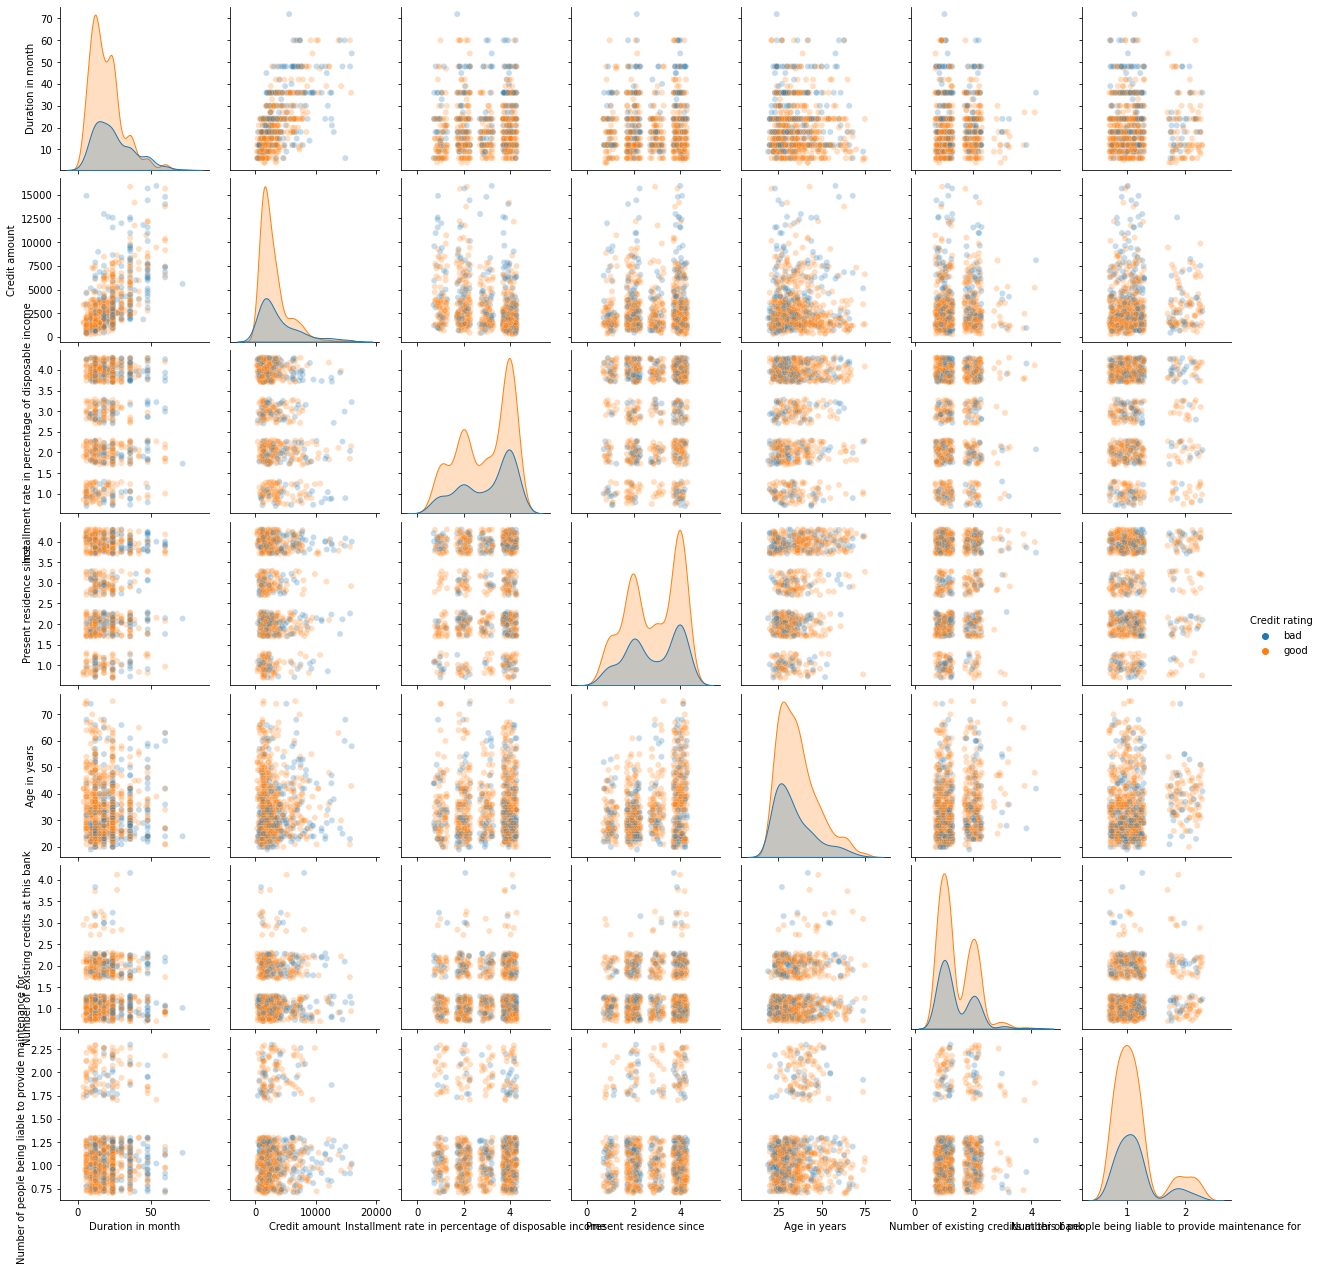

In [98]:
# Pairplotting the numerical columns
# scatter_matrix(data_train, c=y_train, figsize=(30,30), marker='o',
#                hist_kwds={'bins': 15}, s=30);

# code heavily modified by FV

plot_set = train_set.copy()
discrete_attributes = ["Installment rate in percentage of disposable income",
                       "Present residence since",
                       "Number of existing credits at this bank",
                       "Number of people being liable to provide maintenance for"]

n_rows = plot_set.shape[0]

for attr in discrete_attributes:
    plot_set[attr] += np.random.uniform(-0.3, 0.3, size=(n_rows))

sns.pairplot(plot_set, markers='o', hue='Credit rating', plot_kws={'alpha' : 0.25})
plt.show()

**Comment by FV:** It would be nicer to have a plot for the correlation, as for instance generated by the following code.

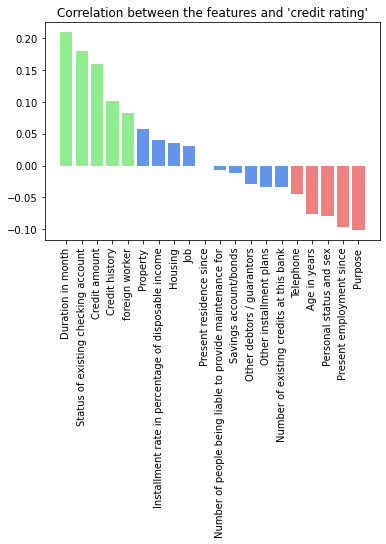

,Credit rating
Duration in month,0.209096
Status of existing checking account,0.180231
Credit amount,0.159488
Credit history,0.101499
foreign worker,0.083184
Property,0.056731
Installment rate in percentage of disposable income,0.039420
Housing,0.036094
Job,0.030433
Present residence since,-0.000745


In [99]:
corrs = data_encoded.corr()["Credit rating"].sort_values(ascending = False)
highlight_val = np.concatenate([corrs.head(5).values, corrs.tail(6).values], axis = 0)
colors = ['cornflowerblue' if i not in highlight_val else 'lightgreen' if i in highlight_val and i > 0 else 'lightcoral' for i in corrs[:-1]]

plt.bar(corrs.index[1:], corrs[1:], color = colors)

plt.title("Correlation between the features and 'credit rating'")

plt.xticks(rotation = 90)

plt.show()
pd.DataFrame(corrs[1:])

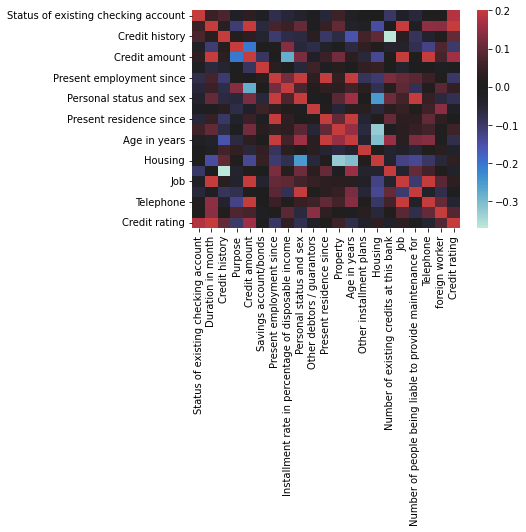

In [100]:
# Correlation between features and target value
corr = data_encoded.corr()
max = np.round(corr.iloc[:-1, -1].abs().sort_values(ascending = False).head(1)[0], 1)
ax = sns.heatmap(corr, vmax=max, center = 0)


# Analysis of Features

In [101]:
def plot_categorical(data_values, x, hue_order_hist):
    '''
    This function plots categorical data.

    Parameters:
    data_encoded : this is a pandas DataFrame which has encoded (ordinal) data in it
    x : is the variable we want to plot
    hue_order_hist : is a ordered list (in which the hue should be ordered)

    Returns:
    None, but prints the plots.
    '''
    temp_data_values = data_values.copy()
    temp_data_values[x] = pd.Categorical(temp_data_values[x], categories = hue_order_hist, ordered = True)
    
    fig, ax = plt.subplots(1,3, figsize = (15, 3))

    hist = sns.histplot(data=temp_data_values,
                        stat='percent',
                        common_norm=False,
                        shrink=0.7,
                        discrete=True,
                        ax = ax[0],
                        x=x,
                        multiple='dodge')
    hist.xaxis.set_ticks(temp_data_values[x].unique())
    hist.set_xticklabels(temp_data_values[x].unique(), rotation = 90)

    hist1 = sns.histplot(data=data_values,
                        hue=x,
                        hue_order = hue_order_hist,
                        stat='percent',
                        common_norm=False,
                        shrink=0.7,
                        discrete=True,
                        ax = ax[1],
                        x="Credit rating",
                        multiple='dodge')

    hist2 = sns.histplot(data=temp_data_values,
                        hue="Credit rating",
                        stat='percent',
                        common_norm=False,
                        shrink=0.7,
                        discrete=True,
                        ax = ax[2],
                        x=x,
                        multiple = 'fill')
    hist2.xaxis.set_ticks(temp_data_values[x].unique())
    hist2.set_xticklabels(temp_data_values[x].unique(), rotation = 90)

    sns.move_legend(hist1, 'lower center', bbox_to_anchor=(0.5, -0.8), borderaxespad=0)

    ax[0].title.set_text('Overall Distribution')
    ax[2].bar_label(ax[2].containers[0], label_type = 'center', fmt = '{:.0%}')
    ax[2].bar_label(ax[2].containers[1], label_type = 'center', fmt = '{:.0%}')
    ax[1].grid(axis = 'y')
    ax[1].title.set_text(f'Distribution of {x}')
    ax[2].grid(axis = 'y')
    ax[2].title.set_text('Normalized Share of\nGood and Bad Credit Ratings by Category')

    plt.show()

def plot_numerical_discrete(data_encoded, x,):
    '''
    This function plots numerical and discrete data.

    Parameters:
    data_encoded : this is a pandas DataFrame which has encoded (ordinal) data in it
    x : is the variable we want to plot

    Returns:
    None, but prints the plots.
    '''
    fig, ax = plt.subplots(1,3, figsize = (15,3), sharex = True, sharey = True)
    
    sns.histplot(data = data_encoded, x = x, kde = True, ax = ax[0], discrete= True, stat = 'percent')

    sns.histplot(data = data_encoded[data_encoded['Credit rating'] == 0], x = x, ax = ax[1], discrete = True, stat = 'percent', kde = True)

    sns.histplot(data = data_encoded[data_encoded['Credit rating'] == 1], x = x, ax = ax[2], discrete = True, stat = 'percent', kde = True, color = 'orange')

    ax[0].lines[0].set_color('crimson')
    ax[0].title.set_text('Overall Distribution')
    ax[1].lines[0].set_color('crimson')
    ax[1].title.set_text(f'Distribution of {x}\nfor Good Credit Ratings')
    ax[2].lines[0].set_color('crimson')
    ax[2].title.set_text(f'Distribution of {x}\nfor Bad Credit Ratings')
    ax[0].grid(axis = 'y')
    ax[1].grid(axis = 'y')
    ax[2].grid(axis = 'y')

    plt.show()

def plot_numerical_continous(data_encoded, x,):
    '''
    This function plots numerical and continious data.

    Parameters:
    data_encoded : this is a pandas DataFrame which has encoded (ordinal) data in it
    x : is the variable we want to plot

    Returns:
    None, but prints the plots.
    '''
    binwidth = np.round((np.max(data_encoded[x]) - np.min(data_encoded[x])) * ((len(data_encoded[x]) ** (1/3))) / (3.49 * np.std(data_encoded[x])))
    binwidth = int(binwidth)
    fig, ax = plt.subplots(1,3, figsize = (15,3), sharex = True, sharey = True)
    
    sns.histplot(data = data_encoded, x = x, kde = True, ax = ax[0], stat = 'percent', bins = binwidth)

    sns.histplot(data = data_encoded[data_encoded['Credit rating'] == 0], x = x, ax = ax[1], stat = 'percent', kde = True, bins = binwidth)

    sns.histplot(data = data_encoded[data_encoded['Credit rating'] == 1], x = x, ax = ax[2], stat = 'percent', kde = True, color = 'orange', bins = binwidth)

    ax[0].lines[0].set_color('crimson')
    ax[0].title.set_text('Overall Distribution')
    ax[1].lines[0].set_color('crimson')
    ax[1].title.set_text(f'Distribution of {x}\nfor Good Credit Ratings')
    ax[2].lines[0].set_color('crimson')
    ax[2].title.set_text(f'Distribution of {x}\nfor Bad Credit Ratings')
    ax[0].grid(axis = 'y')
    ax[1].grid(axis = 'y')
    ax[2].grid(axis = 'y')

    plt.show()

**Status of existing checking account**<br>
* categorical / ordinal<br>
* 0 % missing<br>
* Noisiness and distribution are hard to interpret as it is a categorical value<br>
* Seems usefull, as it has the secound highest correlation with the target variable of all features<br>
* A rising pattern between the categories is recognized for the good credit rating
* A declining pattern between the categories is recognized for the bad credit rating
* High probability of getting a 'good' credit rating especially for category 3 ('no checking account') with 88%<br>
* We can't find evidence that the variables are normal, uniform or gamma distributed

In [102]:
#hue_order_hist = ['... < 0 DM', '0 <= ... < 200 DM', '... >= 200 DM / salary assignments for at least 1 year', 'no checking account']

#plot_categorical(data_values, 'Status of existing checking account', hue_order_hist)

**Duration in month**<br>
* Numerical / discrete <br>
* 0 % missing<br>
* Seems usefull, as it has the second highest correlation with the target variable of all features<br>
* Shorter durations are more likely to be rated as 'good'<br>
* We can't find evidence that the variables are normal, uniform or gamma distributed


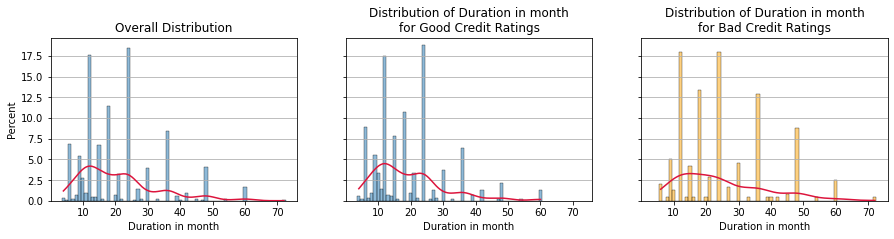

In [103]:
plot_numerical_discrete(data_encoded, 'Duration in month')

**Credit amount**<br>
* numerical / continous <br>
* 0 % missing<br>
* Seems usefull, as it has the third highest correlation with the target variable of all features<br>
* Smaller credit amounts are more likely to be rated as 'good'<br>
* We can't find evidence that the variables are normal, uniform or gamma distributed

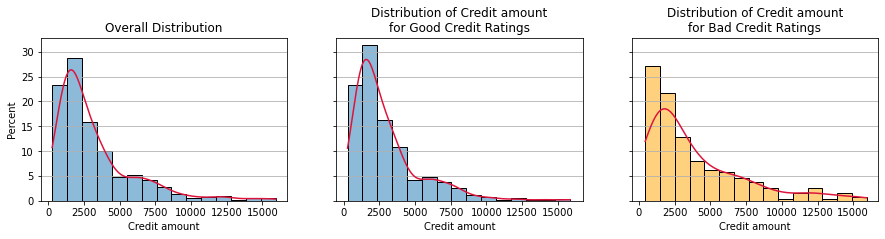

In [104]:
plot_numerical_continous(data_encoded, 'Credit amount')

**Savings account/bonds**<br>
* categorical / nominal <br>
* 0 % missing<br>
* Seems usefull, as it has the fourth highest correlation with the target variable of all features<br>
* High probability of getting a 'good' credit rating especially for categorys 1 ('... >= 1000 DM') & 4 ('unknown/ no savings account') with 85% or 83% respectively<br>
* We can't find evidence that the variables are normal, uniform or gamma distributed

In [105]:
#hue_order_hist = ['... < 100 DM', '100 <= ... < 500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM', 'unknown/ no savings account']

#plot_categorical(data_values, 'Savings account/bonds', hue_order_hist)

**Comment by FV:** Same data as above, as a plot.

**Credit history**<br>
* categorical / nominal <br>
* 0 % missing<br>
* Seems usefull, as it has the fifth highest correlation with the target variable of all features<br>
* High probability of getting a 'good' credit rating especially for category 1 ('critical account/ other credits existing (not at this bank)') with 83%<br>
* Low probability of getting a 'good' credit rating especially for category 4 ('no credits taken/ all credits paid back duly') with 34%<br>
* We can't find evidence that the variables are normal, uniform or gamma distributed

**Comment by FV:** The numerical encoding of the different categorical values does not make semantic sense (I think)! Change the ordering to fix this!

In [106]:
#hue_order_hist = ['no credits taken/ all credits paid back duly', 'all credits at this bank paid back duly', 'existing credits paid back duly till now', 'delay in paying off in the past', 'critical account/ other credits existing (not at this bank)']

#plot_categorical(data_values, 'Credit history', hue_order_hist)

### Usefull data to transfer into the follwing notebooks

In [107]:
# Original dataset and dataset with real values
%store data
%store data_values

# Train/Test splits
%store train_set
%store test_set

# Feature and target variable splits
%store X_train
%store y_train
%store X_test
%store y_test

# Encoded dataset
%store data_encoded
%store data_dummies

# Dictionarys
%store cat_dict
%store lab_encoder
%store ord_encoder

# lists with features
%store attributes
%store num_attribs
%store cat_attribs
%store ordinal_cat_attribs
%store labeled_cat_attribs
%store binary_attribs
%store onehot_attrbs

Stored 'data' (DataFrame)
Stored 'data_values' (DataFrame)
Stored 'train_set' (DataFrame)
Stored 'test_set' (DataFrame)
Stored 'X_train' (ndarray)
Stored 'y_train' (ndarray)
Stored 'X_test' (ndarray)
Stored 'y_test' (ndarray)
Stored 'data_encoded' (DataFrame)
Stored 'data_dummies' (DataFrame)
Stored 'cat_dict' (dict)
Stored 'lab_encoder' (list)
Stored 'ord_encoder' (list)
Stored 'attributes' (list)
Stored 'num_attribs' (list)
Stored 'cat_attribs' (list)
Stored 'ordinal_cat_attribs' (list)
Stored 'labeled_cat_attribs' (list)
Stored 'binary_attribs' (list)
Stored 'onehot_attrbs' (list)
